# Аналитика в авиакомпании "F9"

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

## Цель исследования

Понять предпочтения пользователей, покупающих билеты на те или иные направления.

## Задача исследования

Проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Описание данных

База данных об авиаперевозках:

Таблица `airports` — информация об аэропортах:
* airport_code — трёхбуквенный код аэропорта,
* airport_name — название аэропорта,
* city — город,
* timezone — часовой пояс.

Таблица `aircrafts` — информация о самолётах:
* aircraft_code — код модели самолёта,
* model — модель самолёта,
* range — дальность полётов.


Таблица `tickets` — информация о билетах:
* ticket_no — уникальный номер билета,
* passenger_id — уникальный идентификатор пассажира,
* passenger_name — имя и фамилия пассажира.

Таблица `flights` — информация о рейсах:
* flight_id — уникальный идентификатор рейса,
* departure_airport — аэропорт вылета,
* departure_time — дата и время вылета,
* arrival_airport — аэропорт прилёта,
* arrival_time — дата и время прилёта,
* aircraft_code — уникальный идентификатор самолёта.

Таблица `ticket_flights` — стыковая таблица «рейсы-билеты»:
* ticket_no — номер билета,
* flight_id — уникальный идентификатор рейса.

Таблица `festivals` — информация о фестивалях:
* festival_id — уникальный номер фестиваля,
* festival_date — дата проведения фестиваля,
* festival_city — город проведения фестиваля,
* festival_name — название фестиваля.

## Схема таблиц

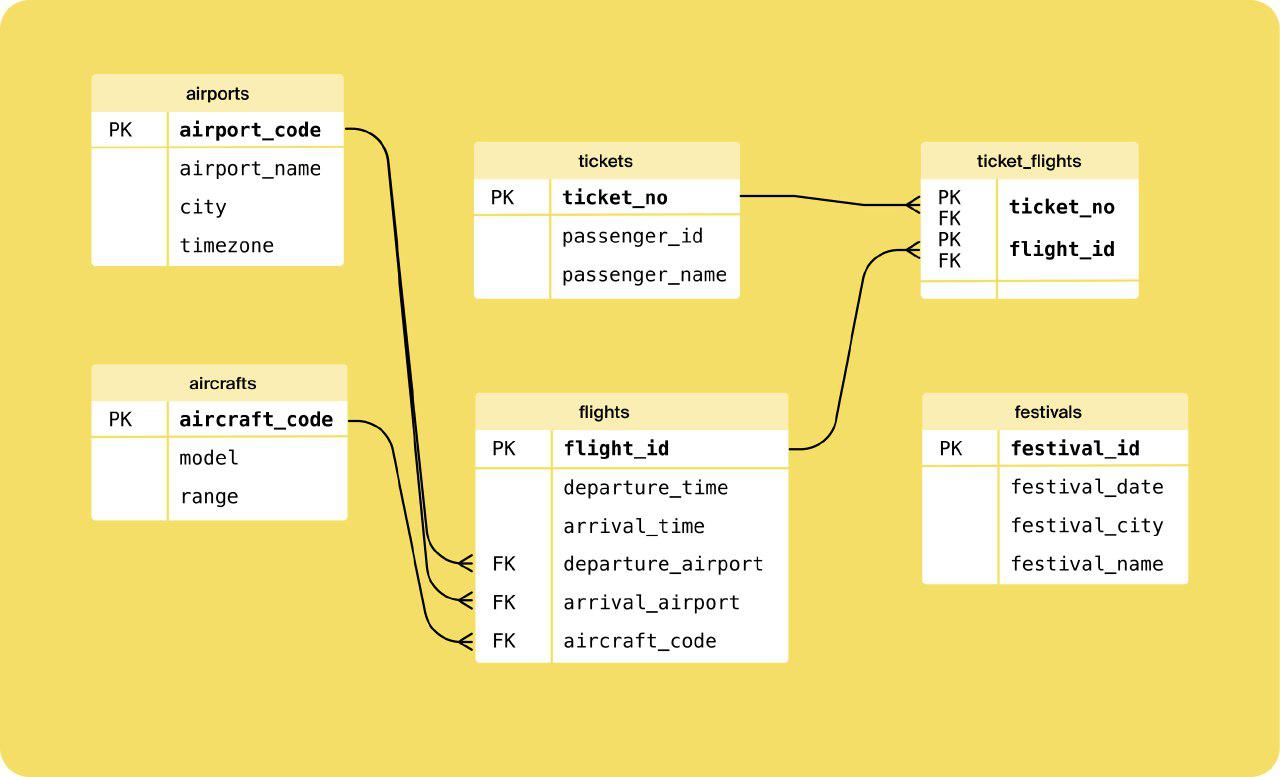

## Примечание

В базе данных нет прямой связи между таблицами `airports` и `festivals`, а также `festivals` и `flights`.

## Изучение общей информации

### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import requests

from tqdm.notebook import tqdm
tqdm.pandas()

sns.set_theme(style="darkgrid")
# sns.set_palette("Greys_r")
warnings.simplefilter('ignore')

### Обзор данных

In [2]:
data = ['query_1.csv', 'query_3.csv']
path = open('link.txt', 'r').readline()

for file in data:
    try:
        response = requests.get(path + file)
        response.raise_for_status()
    except requests.exceptions.HTTPError:
        path = '/datasets/'

q1 = pd.read_csv(path + data[0])
q3 = pd.read_csv(path + data[1])

Для удобства вывода напишем вспомогательные функции:

In [3]:
def sep_text(text):
    return print(f'''
===============================================================
{text: ^64}
===============================================================
    ''')

In [4]:
def brows_data(data, name):
    data.name = name
    sep_text('DataFrame' + ': ' + name)
    display(data)
    sep_text('Info' + ': ' + name)
    display(data.info())
    sep_text('Describe' + ': ' + name)
    display(data.describe().T)
    sep_text('Dtypes' + ': ' + name)
    display(data.dtypes)

Выведем краткую информацию о данных:

In [5]:
df_dict = {'query_1':q1, 'query_3':q3}
for name, df in tqdm(df_dict.items()):
    brows_data(df, name)

  0%|          | 0/2 [00:00<?, ?it/s]


                       DataFrame: query_1                       
    


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185



                         Info: query_1                          
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None


                       Describe: query_1                        
    


,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0



                        Dtypes: query_1                         
    


model             object
flights_amount     int64
dtype: object


                       DataFrame: query_3                       
    


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935



                         Info: query_3                          
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None


                       Describe: query_3                        
    


,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194



                        Dtypes: query_3                         
    


city                object
average_flights    float64
dtype: object

### Выводы

Судя по обзору данных, у нас:
1. Нет пропусков в данных
2. Нет выбросов
3. Корректные типы данных

Красота, а не данные! :)

## Анализ данных

Найдем ТОП-10 городов, в которых наибольшее количество рейсов, и запишем в отдельную переменную

In [6]:
top10 = q3.nlargest(10, 'average_flights')
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### Выводы

Как видим из данных, лидирующие позиции занимают Москва, Санкт-Петербург и Новосибирск.

## Построение графиков

### График зависимости модели самолетов и количество рейсов

In [7]:
def draw_bar(data, index, values, xlabel, ylabel, title, aggfunc = 'sum', figsize = (10,7)):
    (data
        .pivot_table(index = index, values = values, aggfunc=aggfunc)
        .sort_values(by = values)
        .plot(kind = 'barh', figsize=figsize)
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

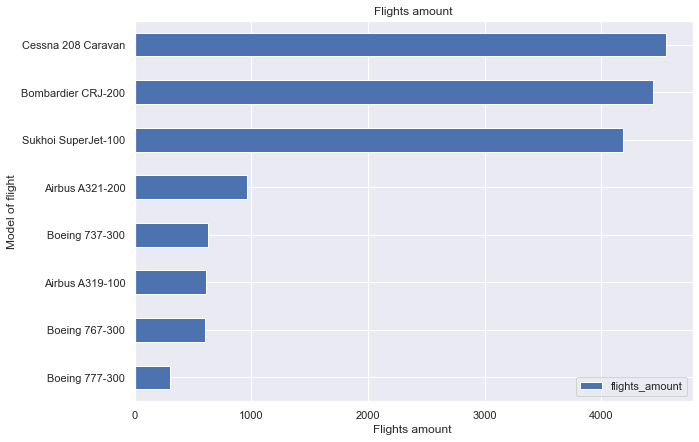

In [8]:
draw_bar(q1, 'model', 'flights_amount', 'Flights amount ', 'Model of flight', 'Flights amount')

Первое место занимает `Cessna 208` - самолет вместимостью 9-13 пассажиров, конечно, чтобы ему перевезти такое же количество, как на Boeing, нужно слетать раз 30-50 :) Скорее всего используются для частных целей и полетов на небольшие расстояния.

Если обратить внимание, то первая 3-ка победителей - самолеты небольшой пассажиро-вместисмости и им требуется бОльшее количество перелетов, чем тем же самым `Boeing` и `Airbus`, которые вмещают по 300-500 человек!


### График зависимости города и количество рейсов

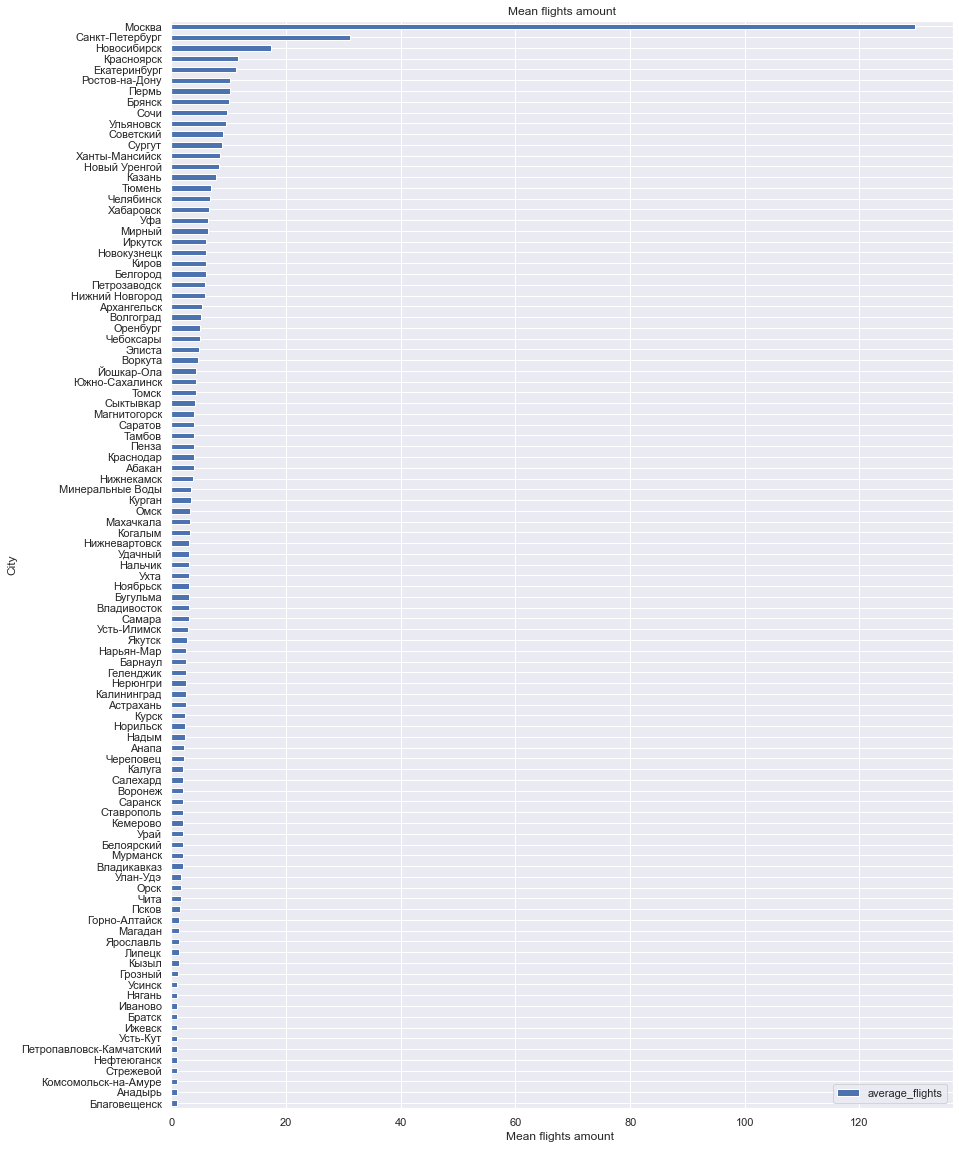

In [9]:
draw_bar(q3, 'city', 'average_flights', 'Mean flights amount ', 'City', 'Mean flights amount', figsize=(14,20))

Лидирующие позиции занимают города-миллионники. Оно и понятно - как город может стать миллионником, если никто не прилетает и не улетает? Да еще и товары доставлять нужно!

### ТОП-10 городов и количество рейсов

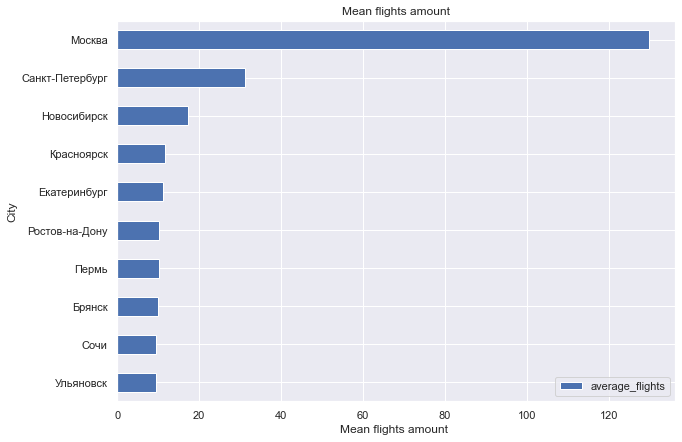

In [10]:
draw_bar(top10, 'city', 'average_flights', 'Mean flights amount ', 'City', 'Mean flights amount')

В ТОП-10 Москва, Санкт-Петербург, Новосбириск - города с населением свыше 1,5 млн. человек. 

Такие показатели у Москвы могут быть связаны с ЧМ по  футболу 2018 года, когда все собирались в Москве, а потом улетали/разъезжались по другим городам России на остальные места проведения.

## Выводы

В целом, можно сказать, что:
1. Размер самолета зависит от количества перелетов: самолетам с большой вместимостью требуется меньше перелетов, чем частным маломестным.
2. По количеству перелетов лидирущие позиции занимают города миллионники.